In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import warnings
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [2]:
data = []
list = [pd.read_json(filename, lines=True) for filename in glob.glob("../week4/data/return-data/*.txt")]
df = pd.concat(list, axis=0)
df.head()

,basket,returnLabel,totalAmount,transactionId,zipCode
0,"[3, 1]",0,106,3520406327,7667
1,[1],0,50,6030070379,7647
2,"[1, 1, 5, 4, 1]",0,175,6579182382,2633
3,"[1, 2, 0, 1]",0,272,2779338441,4309
4,[2],0,14,3198368336,4659


In [3]:
df.drop(['transactionId','zipCode'],axis=1,inplace=True)
df.head()

,basket,returnLabel,totalAmount
0,"[3, 1]",0,106
1,[1],0,50
2,"[1, 1, 5, 4, 1]",0,175
3,"[1, 2, 0, 1]",0,272
4,[2],0,14


In [4]:
def categories(c, value):
    return c.count(value)

for i in range(6):
    df['c_' + str(i)] = df['basket'].apply(lambda x: categories(x, i))

df.drop(['basket'],axis=1,inplace=True)

df.head()

,returnLabel,totalAmount,c_0,c_1,c_2,c_3,c_4,c_5
0,0,106,0,1,0,1,0,0
1,0,50,0,1,0,0,0,0
2,0,175,0,3,0,0,1,1
3,0,272,1,2,1,0,0,0
4,0,14,0,0,1,0,0,0


## Balance before under-sampling

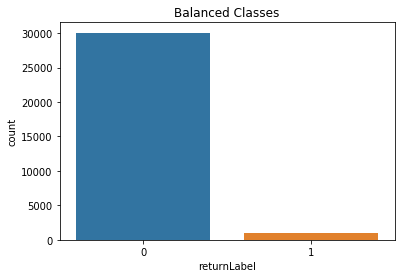

In [5]:
plt.figure()
sns.countplot('returnLabel', data=df)
plt.title('Balanced Classes')
plt.show()

## Under-sampling

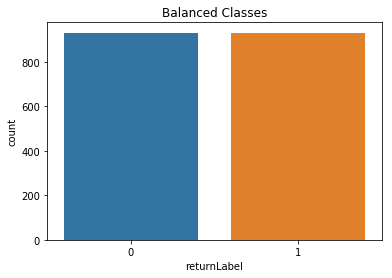

In [6]:
df_return = df.loc[df['returnLabel'] == 1]

df_noreturn = df.loc[df['returnLabel'] == 0]
df_noreturn = df_noreturn.sample(n = len(df_return), random_state=42)

df_balanced = pd.concat([df_return, df_noreturn])

plt.figure()
sns.countplot('returnLabel', data=df_balanced)
plt.title('Balanced Classes')
plt.show()

## Random Forest accuracy on original data

In [7]:
X = df.drop(['returnLabel'],axis=1)
y = df['returnLabel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50,random_state=0)

forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
accuracy = forest.score(X_test, y_test)
accuracy

0.9678709677419355

## Random Forest accuracy on balanced data

In [9]:
X = df_balanced.drop(['returnLabel'],axis=1)
y = df_balanced['returnLabel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50,random_state=0)

forest_balanced = RandomForestClassifier()
forest_balanced.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
accuracy_balanced = forest_balanced.score(X_test, y_test)
accuracy_balanced

0.8378088077336198